<h1>Content</h1>

1. [Research data from a file](#Research-data-from-a-file)
2. [Data preparation](#Data-preparation)
    * 2.1. [Adjustment of column names](#Adjustment-of-column-names)
    * 2.2. [Processing NaNs](#Processing-NaNs)
    * 2.3. [Data types conversion](#Data-types-conversion)
    * 2.4. [Checking for duplicates](#Checking-for-duplicates)
    * 2.5. [Calculating total sales](#Calculating-total-sales)
3. [Exploratory data analysis](#Exploratory-data-analysis)
    * 3.1. [Analysis of game data for all years](#Analysis-of-game-data-for-all-years)
    * 3.2. [Analysis of game data for the actual period](#Analysis-of-game-data-for-the-actual-period)
4. [Creating of the user description of each region](#Creating-of-the-user-description-of-each-region)
5. [Tests of hypotheses](#Tests-of-hypotheses)
6. [General conclusion](#General-conclusion)

# Research of computer game sales and the identification of patterns

From open sources we have historical data on game sales, users and experts feedback, genres and platforms (e.g. Xbox or PlayStation). It is necessary to conduct research and identify the patterns that determine the success of a game. This will allow to identify a potentially popular product and plan advertise.

**Data description**
- Name — name of game;
- Platform — platform (e.g. Xbox or PlayStation);
- Year_of_Release — year of release;
- Genre — genre of game;
- NA_sales — sales in North America (millions of copies sold);
- EU_sales — sales in Europe (millions of copies sold);
- JP_sales — sales in Japan (millions of copies sold);
- Other_sales — sales in other countries (millions of copies sold);
- Critic_Score — experts evaluation  (max 100);
- User_Score — user evaluation (max 10);
- Rating — rating from the ESRB (Entertainment Software Rating Board) organization. This association determines the rating of computer games and assigns them to the appropriate age category.

The data for 2016 may be incomplete.



## Research data from a file

Import libraries and basic settings:

In [1]:
from matplotlib import pyplot as plt
from scipy import stats as st
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

Reading a data file, viewing dataframe information and displaying 5 arbitrary lines:

In [2]:
games = pd.read_csv('D:\Work\Яндекс-практикум\Курс 5. Сборный проект - 1\games.csv')
games.info()
games.sample(n=5, random_state=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
14230,Rakushou! Pachi-Slot Sengen 5: Rio Paradise,PS2,2007.0,Misc,0.00,0.00,0.03,0.00,NaN,NaN,NaN
14043,Nobunaga's Ambition II,3DS,2015.0,Strategy,0.00,0.00,0.04,0.00,NaN,NaN,NaN
3158,Up,DS,2009.0,Action,0.30,0.27,0.00,0.07,NaN,tbd,E
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN
110,Mario Kart 8,WiiU,2014.0,Racing,3.15,2.15,1.28,0.51,88.0,9.1,E


Displays a numeric description of the columns:

In [3]:
games[['Year_of_Release', 'NA_sales', 'EU_sales', 'JP_sales', 'Other_sales', 'Critic_Score']].describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


The table contains 11 columns, of which 6 have a float and 5 have an object data type. The total amount of data is 16715, and in the columns `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score`, `Rating` less data, so there are gaps in them. 

The column names contain capital letters, which is inconvenient when performing an analysis, so the column names must be in lower case.

The `Year _ of _ Release` column contains the year of release of the game, and has a float data type. It will need to be converted to an unsigned subtype of an integer type.

**Conclusion of step 1**

Preliminary analysis of the data showed that before conducting the study it is necessary to process NaNs, bring the column names to lower case, and convert the data types.

## Data preparation

### Adjustment of column names

As you can see from the description of the data, the column names are quite informative, but for the convenience of further analysis they need to be converted to lower case.

In [4]:
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Processing  NaNs

Let's display the number of NaNs in all columns of the dataframe on the screen:

In [5]:
games.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

<br><br>
**Processing NaNs by columns 'name' and 'genre'**

Columns `name` и `genre` contains 2 NaNs each. Display the rows with missing values in the column `name`:

In [6]:
games[games['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


We can see that the lines with the missing game name also miss the genre. Since it is impossible to determine the game name and genre from the available data, and the volume of such data is negligibly small compared to the total data volume, let's delete these two lines.

In [7]:
games.dropna(subset = ['name'], inplace = True)
games = games.reset_index(drop=True)

<br><br>

**Processing NaNs by column 'year_of_release'**

Now let's move on to processing NaNs in the column `year_of_release`. Fill in the NaNs in the column with the year of release by matching the name of the game. To do this, group the dataset by game name (columns `name`) and take the minimum value of the year of release, assuming that mostly games for different platforms are released at the same time.

In [8]:
games_names = games.groupby('name')['year_of_release'].min()

for i in games_names.index:
    games.loc[games['name'] == i,'year_of_release'] = games.loc[games['name'] == i,'year_of_release'].fillna(games_names[i])

print('Number of NaNs in the column  year_of_release After filling in NaNs:', 
      len(games[(games['year_of_release'].isna() == True)]))

Number of NaNs in the column  year_of_release After filling in NaNs: 146


We still have 146 NaNS in the column  `year_of_release`, but we cannot determine the year of the games release from the other available data. Let's see what share of the lines with missing year in the total data volume. 

In [9]:
print('Number of rows with gaps in the column year_of_release is {:.2%} of the total amount of data.'
      .format(games['year_of_release'].isnull().sum() / len(games)))

Number of rows with gaps in the column year_of_release is 0.87% of the total amount of data.


The proportion of such rows is small, only less than 1%, so removing them will not lead to any noticeable distortion of the results.

In [10]:
games.dropna(subset = ['year_of_release'], inplace = True)
games = games.reset_index(drop=True)

<br><br>

**Processing NaNs in column 'rating'**

To move on to filling in the NaNs of the column `rating`. First see what values it contains:

In [11]:
games['rating'].value_counts()

E       3958
T       2930
M       1554
E10+    1412
EC         8
K-A        3
RP         2
AO         1
Name: rating, dtype: int64

For understanding, here is a deciphering of the letter designations of the age rating:

- EC («Early childhood») — for children: the game is suitable for children from 3 years old;
- E («Everyone») — for everyone: the content is quite suitable for the age group from 6 years;
- E10+ («Everyone 10 and older») — for the age group from 10 years;
- T («Teen») — For teens: иfor the age group from 13 years;
- K-A («Kids to Adults») — for children and adults (not currently in use because it was renamed E - for all ages in 1998);
- M («Mature») — for adults: the game materials are not suitable for teenagers under 17;
- AO («Adults Only 18+») — adults only: the content of the game is only for adults over 18;
- RP («Rating Pending») — rating expected.

assume that if the game's age rating is not listed, it means it hasn't been assigned yet. Let's fill in the NaNs with 'rating expected', which is 'RP', because `rating` contains only two values of 'RP', and it will not affect our futher analysis:

In [12]:
games['rating'] = games['rating'].fillna('RP')

<br><br>

**Processing NaNs by column 'critic_score'**

Output all unique values in this column:

In [13]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 13.])

NaNs in `critic_score` may appear because some games have not enough scores for the value to be assigned

In the data familiarization phase, we saw that the minimum value of the critics' score in our data is 13, and the maximum is 98, and there is not a zero score. And this is to be expected - if an expert evaluates a game, he or she should put some value other than zero, at least the minimum value. Therefore, it is more logical to fill in the blanks with `0` - this will serve as a marker of the expert' lack of evaluation.

Translated with www.DeepL.com/Translator (free version)

Also note that the `critic_score` column contains only positive integers - we will need this observation in the data type conversion step. 

In [14]:
games['critic_score'] = games['critic_score'].fillna(0)

<br><br>

**Processing NaNs by column 'user_score'**

Similar to the `critic_score` column, let's use the `.unique()` method to view the contents of the `user_score` column:

In [15]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

The reason for the NaNs in the column with the user rating can be similar to the situation with the gaps in the column`critic_score`.

In addition to the blanks, this column contains real numbers from 0 to 10 with one decimal place, as well as the non-numeric value 'tbd'.This acronym stands for 'to be determined', which means 'to be determined', i.e., the value will soon be determined. Essentially, the NaNs and the 'tbd' value mean the same thing to us - the user score is undefined. But to use the solution for the column `critic_score` (fill in the gapsw with zeros) we can not, because users can put a zero grade.
In this regard, let's choose a negative number as a marker to fill in the gaps `-1`. Also overwrite the values 'tbd' in the column `user_score` on the same marker:


In [16]:
games['user_score'] = games['user_score'].fillna(-1)
games.loc[games['user_score'] == 'tbd', 'user_score'] = -1

The `user_score` column now contains only numbers.

<br><br>

Check that all the gaps are filled in:

In [17]:
games.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Conclusion**
There are no more NaNs in the data. During processing, it was decided to delete 148 rows, but since this represents less than 1% of the total data volume, such a measure would not affect the results of further research. Also, all values in the `user_score` column were reduced to numbers, and it was found that the data in the `critic_score` column have positive integer values.

### Data types conversion

At previous stage  we found that some columns have incorrect data types for research. Replace the data types with more convenient and logical ones.

- columns `year_of_release` and `critic_score` contain integer values, and have a float data type (float64). Convert these columns to unsigned integer type uint16 and uint8 by the method `.astype()`;
- column `user_score` contain numeric values, so covert it from object-type (object) to float-type (float64).

In [18]:
games['year_of_release'] = games['year_of_release'].astype('uint16')
games['critic_score'] = games['critic_score'].astype('uint8')
games['user_score'] = games['user_score'].astype('float64')

print('The data types in the calls table have been changed, the result:')
print()
games.info()

The data types in the calls table have been changed, the result:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16567 entries, 0 to 16566
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  uint16 
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     16567 non-null  uint8  
 9   user_score       16567 non-null  float64
 10  rating           16567 non-null  object 
dtypes: float64(5), object(4), uint16(1), uint8(1)
memory usage: 1.2+ MB


**Conclusion**

The conversion brought the data types to correct types, and the memory consumption was reduced by 15%.

### Checking for duplicates

Check the data for duplicates:

In [19]:
print('Number of duplicates in dataframe:', games.duplicated().sum())

Number of duplicates in dataframe: 0


**Conclusion**

No duplicates were found in the dataset.

### Calculating total sales

Calculate the total sales in all regions and record the result in a separate column `total_sales`. To do this, sum up the numbers in the columns `na_sales`, `eu_sales`, `jp_sales` and `other_sales`. Display 5 random lines to see the result.

In [20]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.sample(n=5, random_state=1)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
12137,The Guided Fate Paradox,PS3,2013,Role-Playing,0.00,0.00,0.06,0.00,74,7.8,T,0.06
14701,Putty Squad,PSV,2013,Platform,0.01,0.01,0.00,0.01,0,8.2,E10+,0.03
272,Daxter,PSP,2006,Platform,2.45,1.01,0.00,0.75,85,8.7,E10+,4.21
7153,Ms. Pac-Man: Maze Madness,N64,2000,Puzzle,0.18,0.04,0.00,0.00,0,-1.0,RP,0.22
9369,Contra III: The Alien Wars,SNES,1992,Shooter,0.00,0.00,0.13,0.00,0,-1.0,RP,0.13


**Conclusion of step 2**

By eliminating NaNs, transferring data types, and adding a new column with total sales (in millions of copies sold) to the dataset, we prepared the data for further research.

## Exploratory data analysis

### Analysis of game data for all years

**Number of games in different years**

Group the data by years of release and calculate how many games were released in different years. Save the result to a separate dataframe `games_per_year`:

In [21]:
games_per_year = games.groupby(['year_of_release']).agg({'total_sales': ['count']}).reset_index()
games_per_year.columns = list(games_per_year.columns)
games_per_year.columns

Index([('year_of_release', ''), ('total_sales', 'count')], dtype='object')

Rename the columns to `games_per_year` and display the new column names to see the result:

In [22]:
games_per_year.rename(columns={('year_of_release', ''): 'year_of_release', ('total_sales', 'count'): 'games_quantity'},
                      inplace=True)
games_per_year.columns

Index(['year_of_release', 'games_quantity'], dtype='object')

Visualize the data of the resulting dataframe: Build a graph with the years `year_of_release` on the X-axis and the number of released games `games_quantity` on the Y-axis.

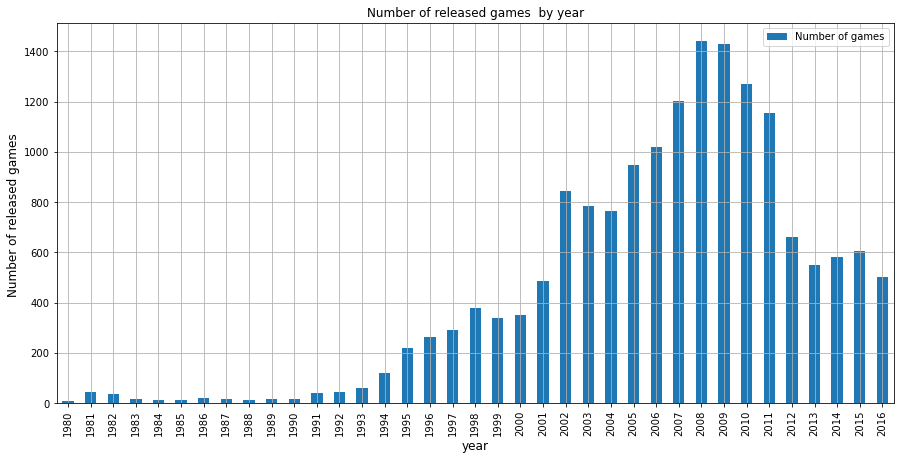

In [23]:
ax = games_per_year.plot(x='year_of_release',
                         y='games_quantity', kind='bar',
                         figsize=(15, 7), grid=True,
                         label='Number of games'
                        )
ax.set_title('Number of released games  by year')
ax.set_xlabel('year', fontsize = 12)
ax.set_ylabel('Number of released games ', fontsize = 12)
plt.show()

Between 1980 and 1993, a very small number of games were released. This is due to the fact that the computer games industry was just beginning, and few people had video game consoles. After that, there was a noticeable increase starting in 1994, until 1998. In 1999-2000 the number of released games decreased slightly, but in 2001 it exceeded the level of 1998. In 2002, we can see almost twofold increase. During 2003-2004 the number of games remained approximately the same (at the level of 800 games a year), and then from 2005 to 2008 it grew dynamically. Releases of computer games peaked in 2008 and 2009. In 2010 and 2011, the number of games declined evenly, until in 2012 it almost halved. Since 2013, the number of games has remained about the same (at 600 games per year).

Obviously, the market for computer games has changed over time, some platforms have become obsolete, others have emerged, and the availability of games has increased. The number of games released over the years has risen and fallen. The data for all years from 1980 to 2016 are not important for our research, because we are planning sales and advertising  for 2017. Therefore, at once we will allocate the period of relevance for the analysis - it is the last 5 years - from 2012 to 2016 inclusive.


<br>

**Total sales by platform and year**

Study how sales changed by platform. To do this, group the data by platform and year of release, and calculate total sales for each. Save the result to a new dataset `games_per_year_platform`:

In [24]:
games_per_year_platform = (games
                           .groupby(['platform', 'year_of_release'])
                           .agg({'total_sales': ['sum']})
                           .reset_index()
                          )
games_per_year_platform.columns = list(games_per_year_platform.columns)
games_per_year_platform.columns

Index([('platform', ''), ('year_of_release', ''), ('total_sales', 'sum')], dtype='object')

Rename the columns for a more convenient presentation of the data, and display the new column names:

In [25]:
games_per_year_platform.rename(columns={('platform', ''): 'platform',
                                        ('year_of_release', ''): 'year_of_release',
                                        ('total_sales', 'sum'): 'total_sales'}, inplace=True)
games_per_year_platform.columns

Index(['platform', 'year_of_release', 'total_sales'], dtype='object')

Display the total sales by platform using the `.pivot_table()` method, and identify the platforms with the largest number of total sales. To do this, sort the table in descending order by the `total_sales` column:

In [26]:
(games_per_year_platform
 .pivot_table(index='platform', values='total_sales', aggfunc='sum')
 .sort_values(by='total_sales', ascending=False)
 .head(10)
)

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


The summary table above shows that the platforms with the highest total sales are in the first six lines (the sales of games for the platform from the seventh line PS4 is already 2 times less than from the sixth line PS). See how sales for the six most popular platforms changed from year to year. Plot the distribution of sales by year:

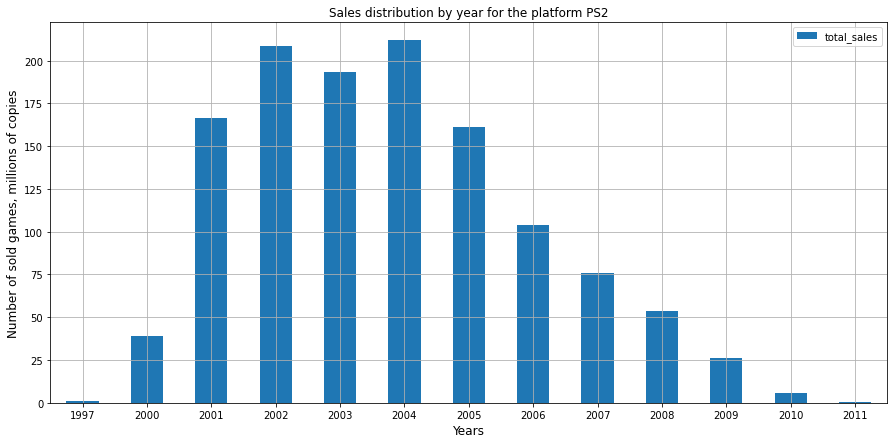

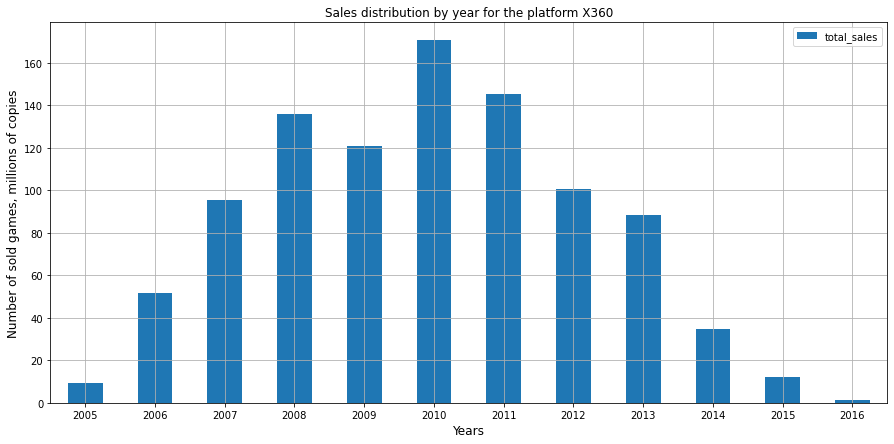

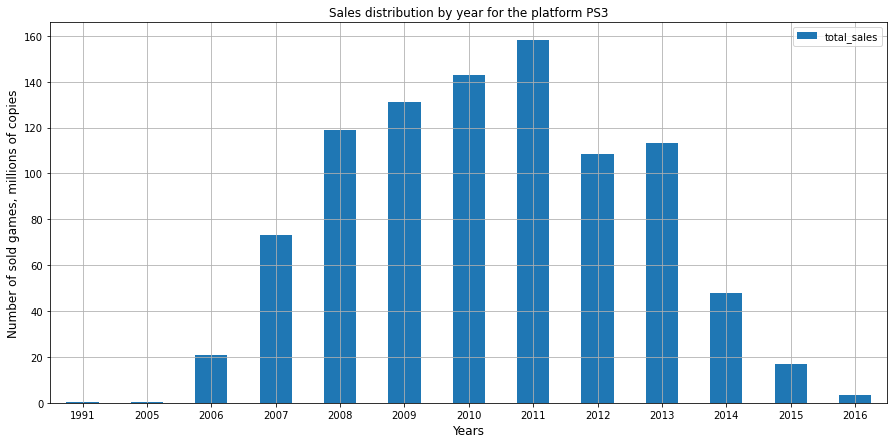

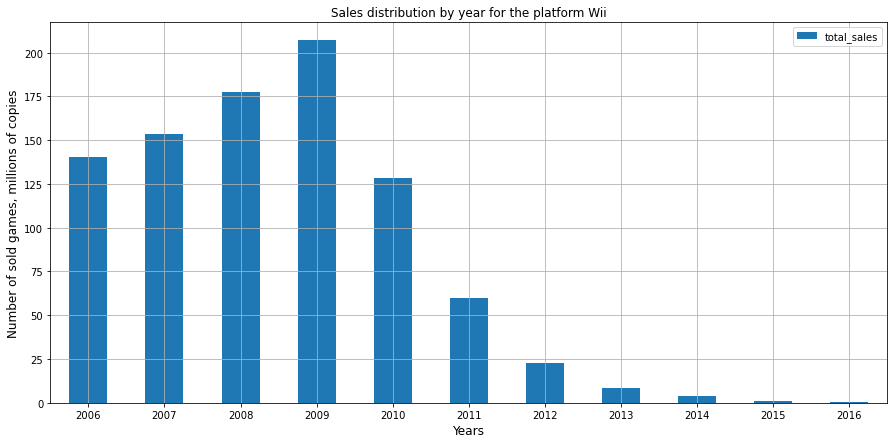

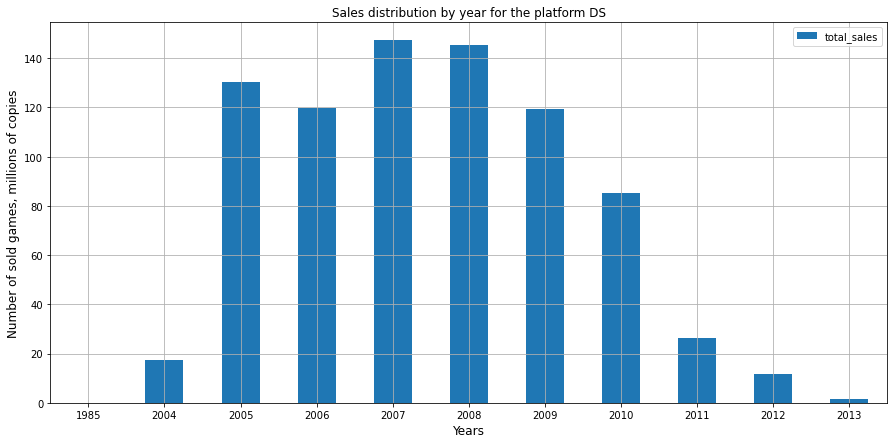

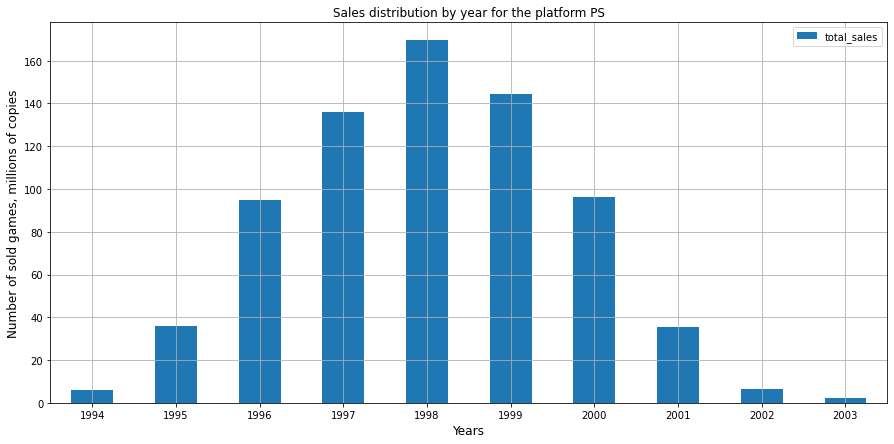

In [85]:
platform_names = ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

for i in platform_names:
    ax = games_per_year_platform[games_per_year_platform['platform'] == i].plot(x='year_of_release',
                                                                                y='total_sales',
                                                                                kind='bar',
                                                                                figsize=(15, 7),
                                                                                grid=True)
    ax.set_title('Sales distribution by year for the platform ' + i)
    ax.set_xlabel('Years', fontsize = 12)
    ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
    plt.xticks(rotation=0)
    plt.show()

The charts show that the "lifetime" of a platform is an average of 10 years - it is during this period that the graphs show a distribution of values. During this period, new platforms appear and disappear. We also see additional confirmation of the correctness of the previously made choice of the current period of 5 years - in such lengths of intervals are observed major trends: highs, periods of growth and decline.

**Conclusion**

Researched how the number of released games changed over the years and analyzed the graphs of the distribution of total sales by year for the six most popular platforms, we determined that to establish a forecast for 2017 we need only data  for the last 5 years, not for the entire period. Thus, the period of relevance is the period from 2012 to 2016 inclusive.

### Analysis of game data for the actual period

**Identify of potentially profitable platforms**

Exclude from the dataframe `games_per_year_platform` the data for 1980-2011 in order to research only the data for the current period and write in the table `games_per_platform_actual`:

In [28]:
games_per_platform_actual = games_per_year_platform[games_per_year_platform['year_of_release'] > 2011].copy()

To see which platforms lead in sales, make a summary table that shows the total sales of games for each platform by year:

In [29]:
games_per_platform_actual.pivot_table(index=['platform'], columns='year_of_release', values='total_sales', aggfunc='sum')

year_of_release,2012,2013,2014,2015,2016
platform,,,,,
3DS,51.76,56.57,43.76,27.78,15.14
DS,11.67,1.54,NaN,NaN,NaN
PC,23.45,13.01,13.28,8.52,5.25
PS3,108.28,113.25,47.76,16.82,3.60
PS4,NaN,25.99,100.00,118.90,69.25
PSP,7.95,3.38,0.24,0.12,NaN
PSV,16.19,10.59,11.90,6.25,4.25
Wii,22.94,8.59,3.75,1.14,0.18
WiiU,17.56,21.65,22.03,16.35,4.60


The table shows that the highest volume of sales in 2016 came from games for the PS4 platform, the second place is taken by the XOne, and the third place is taken by the 3DS. However, in comparison with 2015, there is a decrease in sales for all platforms. The historical maximum for the 5 years from 2012 to 2016 belongs to the platform PS4 and is equal to 118.9 million copies (2015).

Display all the platforms that we have left in our dataframe after updating the years. We will need this list when plotting charts.

In [30]:
games_per_platform_actual['platform'].unique()

array(['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU',
       'X360', 'XOne'], dtype=object)

Generate charts of the number of sold copies of games depending on the year for each platform to show the trends of growth or decline:

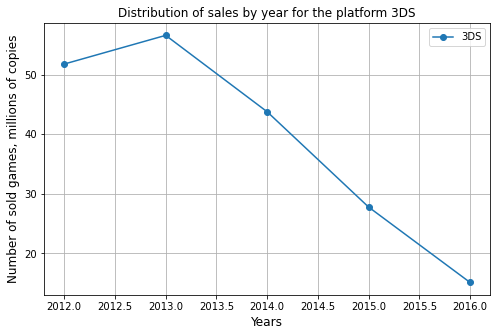

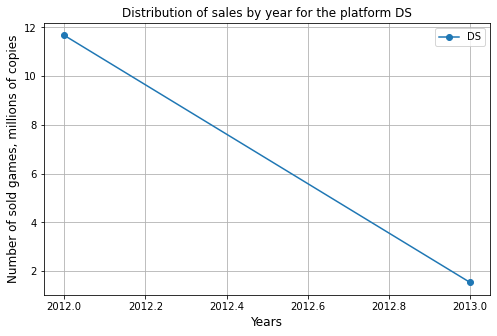

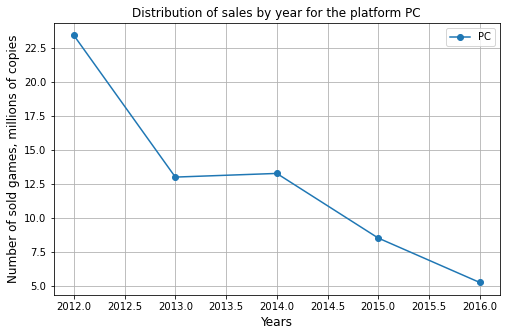

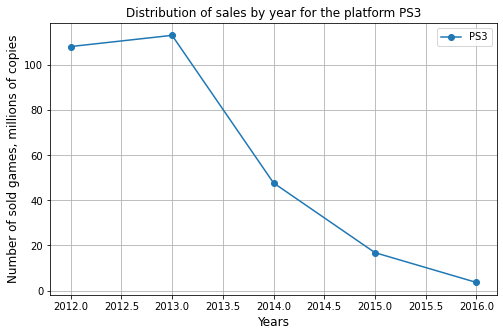

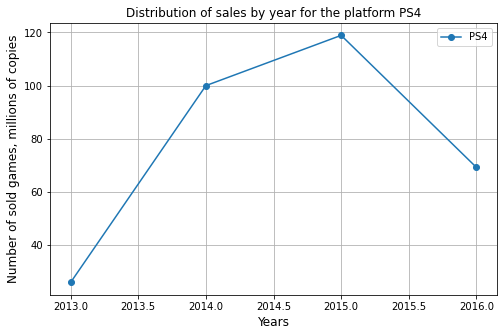

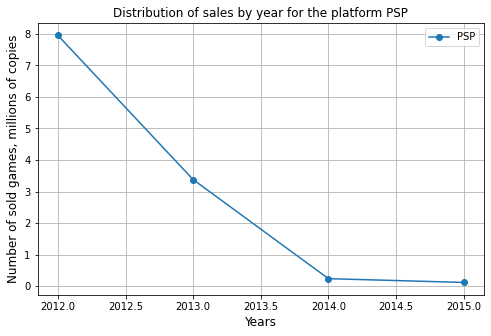

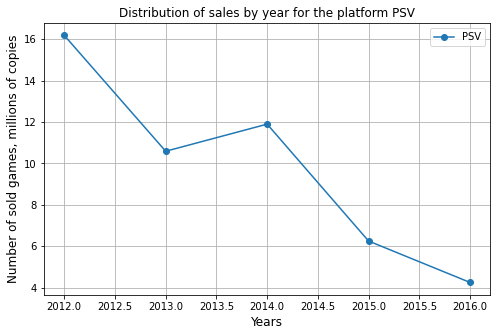

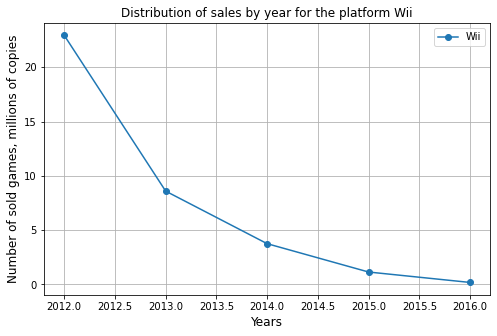

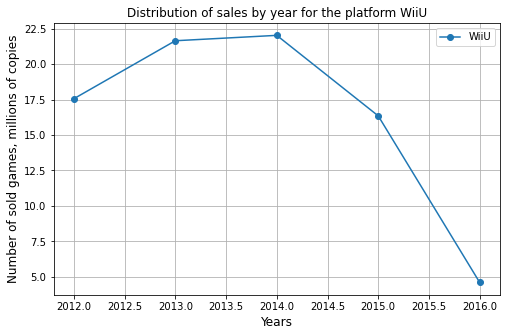

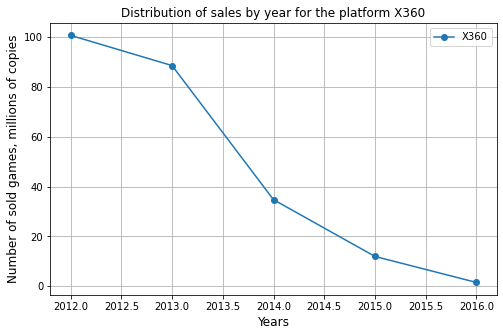

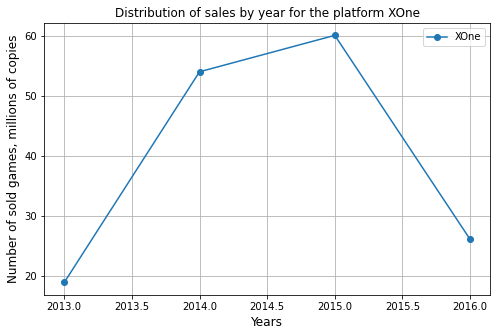

In [31]:
platforms_list = ['3DS', 'DS', 'PC', 'PS3', 'PS4', 'PSP', 'PSV', 'Wii', 'WiiU','X360', 'XOne']

for n in platforms_list:
    ax = games_per_platform_actual[games_per_platform_actual['platform'] == n].plot(x = 'year_of_release',
                                                                                    y = 'total_sales',
                                                                                    label=n,
                                                                                    style='o-',
                                                                                    figsize=(8, 5),
                                                                                    grid=True)
    ax.set_title('Distribution of sales by year for the platform ' + n)
    ax.set_xlabel('Years', fontsize = 12)
    ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
    plt.show()

The charts show that for all platforms except XOne, PS4, WiiU, have decline in sales during the period. 

Let's take a closer look at the charts for the three above-mentioned platforms-exceptions:
- For the WiiU platform, there is an increase from 2012 to 2014, while the period from 2014 to 2016 shows a rather steep decline - 2016 sales were about 4 times lower than in 2015;
- sales of games for the XOne platform have also slumped heavily in the last year - we can see  decrease of about 3 times in 2016 compared to 2015, despite the fact that sales were rising in previous periods;
- the smallest decline in the 2015-2016 period is seen in sales for the PS4 platform - 2 times. At the same time PS4 is the leader in the number of sold copies for the last three years.

Generate charts of total game sales by platform:

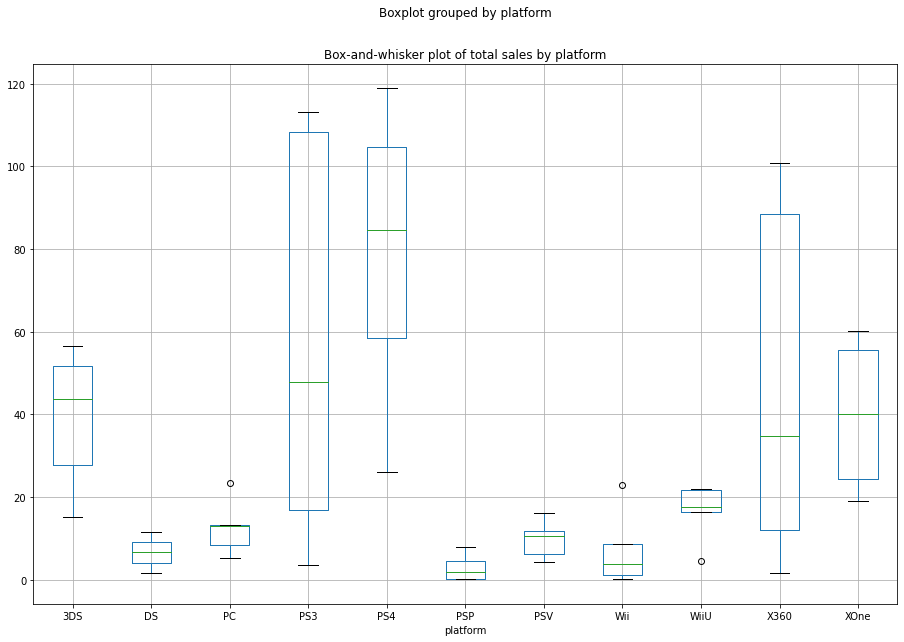

In [32]:
games_per_platform_actual.boxplot('total_sales', by = 'platform', figsize=(15, 10))
plt.title('Box-and-whisker plot of total sales by platform')
plt.show()

In this charts you can clearly see the range for platforms with a large spread. However, for platforms with small spreads, these charts are not informative. Therefore, let's make another chart, setting the `ylim` parameter in the range from `-1` to `23`, in order to consider other diagrams.

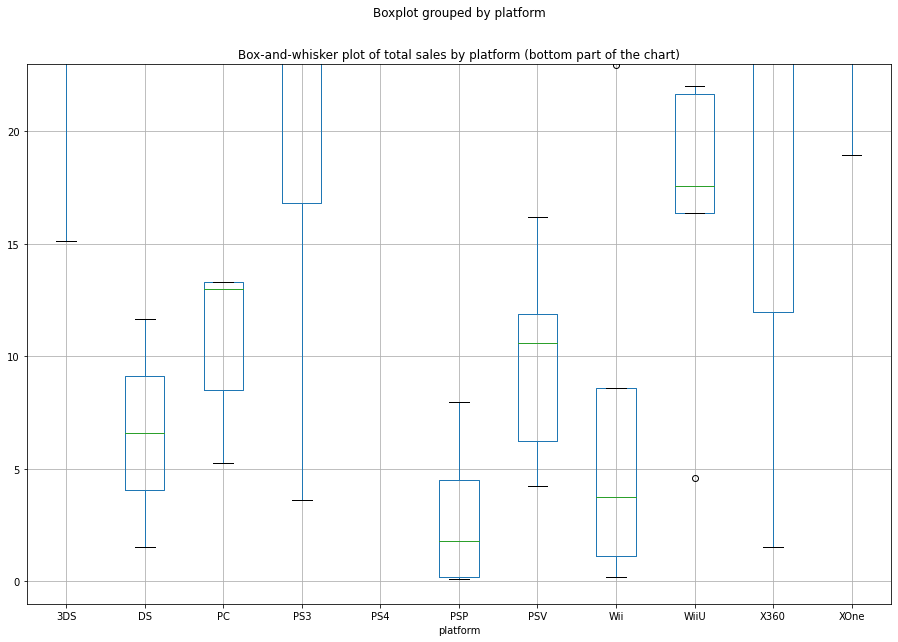

In [33]:
games_per_platform_actual.boxplot('total_sales', by = 'platform', figsize=(15, 10))
plt.title('Box-and-whisker plot of total sales by platform (bottom part of the chart)')
plt.ylim(-1, 23)
plt.show()


The following five platforms have the highest median sales: 3DS, PS3, PS4, X360, XOne. Describe their boxplots:

The PS3 platform has the highest boxplot sales data. This is due to the fact that games for this platform sold well in the period up to 2013, and then went a decline due to the release of the new generation platform PS4, so by 2016 sales decreased tenfold.
There was also a big range on the X360 platform. This platform remained one of the most popular for a long time, but in April 2016 the manufacturer announced the cessation of production. As a consequence, sales of games for this platform by 2016 fell to  1.52 million copies, while in 2012 the sales level was 100.72 million copies.
The sales values for the 3DS and XOne platforms are roughly the same. The median values are also about the same. However, there is still a difference. XOne is a newer gaming platform, it was released in 2013, at that time the 3DS platform already existed and reached a peak in sales of games designed for it, after which sales have been continuously declining. The XOne peaked in 2015, and although there was a decline in 2016, the absolute sales of XOne in 2016 are noticeably higher than the 3DS.
The highest median, first quartile and third quartile chart is for the PS4 platform. This platform came out at the end of 2013 and at the end of 2016 the sales of games for it have the highest values.
From the above it follows that we can distinguish two potentially profitable platforms - PS4 and XOne.

<br>

**The impact of experts and users feedback on sales**

Let's take a look at how user and critical reviews affect game sales within the PS4 platform over the current period. Make an appropriate cross-section of the data. The condition will be one:`platform == "PS4"`and the relevance of the time period will get itself, as in 2012 and earlier this platform has not yet existed.

In [34]:
games_ps4 = games.query('platform == "PS4"')

Build a  chart and calculate the correlation between  `critic_score` and sales `total_sales`. Exclude games with missing value of critics' reviews from the sample.

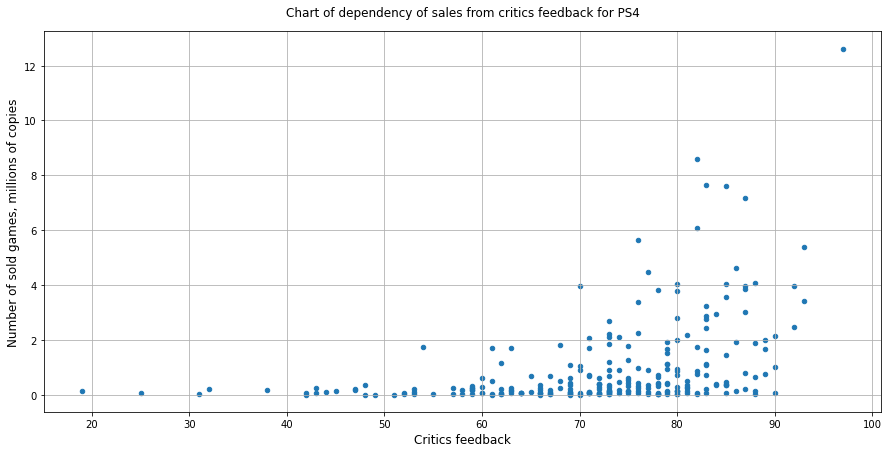

In [35]:
ax = games_ps4[games_ps4['critic_score'] != 0].plot(x='critic_score',
                                                    y='total_sales',
                                                    kind='scatter',
                                                    figsize=(15, 7),
                                                    alpha=1,
                                                    grid=True)
ax.set_title('Chart of dependency of sales from critics feedback for PS4', pad=15)
ax.set_xlabel('Critics feedback', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.show()

In [36]:
print('Correlation between critics feedback and sales for the PS4:',
      games_ps4[games_ps4['critic_score'] != 0]['critic_score'].corr(games_ps4[games_ps4['critic_score'] != 0]['total_sales']))

Correlation between critics feedback and sales for the PS4: 0.40656790206178123


The point of maximum sales corresponds to the maximum score of the critics. In general, the highest sales are observed where the score is greater than 70. But there is no direct correlation - we can see a large number of points near zero sales, despite high marks. The correlation also shows a positive, but not too strong relationship. Obviously, other factors also affect sales. 

Similarly, research the relationship between user `user_score' sales, and exclude missing scores.

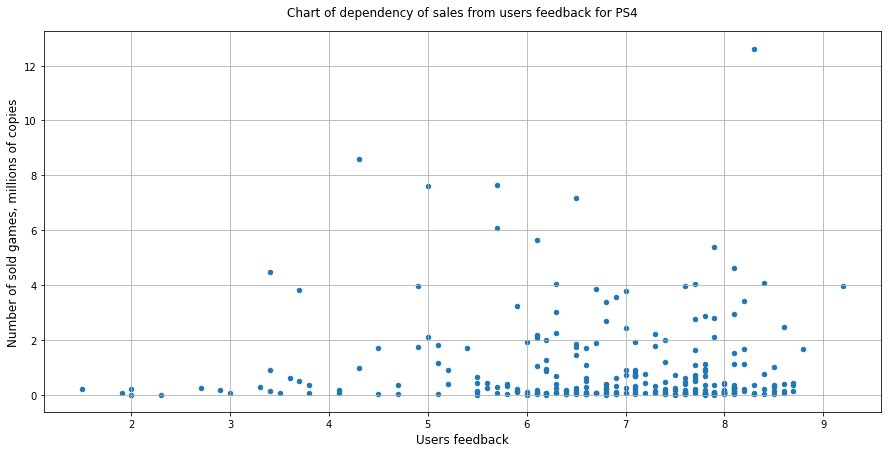

In [37]:
ax = games_ps4[games_ps4['user_score'] != -1].plot(x='user_score',
                                                   y='total_sales',
                                                   kind='scatter',
                                                   figsize=(15, 7),
                                                   alpha=1,
                                                   grid=True)
ax.set_title('Chart of dependency of sales from users feedback for PS4', pad=15)
ax.set_xlabel('Users feedback', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.show()

In [38]:
print('Correlation between users feedback and sales for the PS4:',
      games_ps4[games_ps4['user_score'] != -1]['user_score'].corr(games_ps4[games_ps4['user_score'] != -1]['total_sales']))

Correlation between users feedback and sales for the PS4: -0.03195711020455644


There is a very interesting pattern here! Although the maximum sales correspond to a fairly high score - about 8.3, the second highest sales value corresponds to a score below average (about 4.3), and in general, high sales are observed in the interval of average scores - from 4 to 7. And in the interval with higher scores (above 5.5) we see an abundance of rather small sales values. The negative correlation signals a tendency toward an inverse relationship, but the absolute value of this parameter, which is close to zero, indicates an actual lack of correlation between the value of sales and users' evaluations.

This conclusion shows that users trust reviews and critics' evaluations a lot more when deciding to buy a game, while users' evaluations are almost not taken into account, considering them too subjective.

We should not forget that our conclusions are true only for one platform - PS4. So now investigate the impact of estimates on sales for all other platforms (excluding PS4) as a whole for the current period. Create an appropriate cross-section:

In [39]:
games_other_platforms = games.query('platform != "PS4" and year_of_release > 2011')

Similarly, let's build scatter diagrams and calculate the correlation between critics' and users' scores and `total_sales'. Let's exclude games with missing value of scores from the sample.

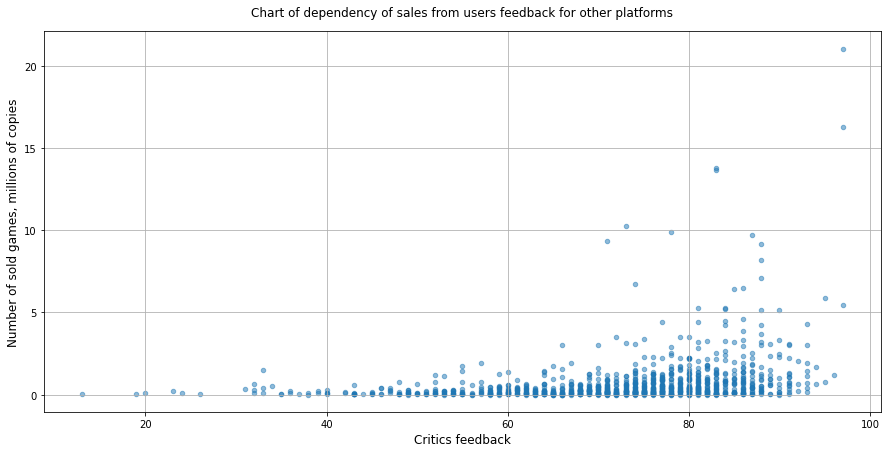

In [40]:
ax = games_other_platforms[games_other_platforms['critic_score'] != 0].plot(x='critic_score',
                                                                            y='total_sales',
                                                                            kind='scatter',
                                                                            figsize=(15, 7),
                                                                            alpha=0.5,
                                                                            grid=True)
ax.set_title('Chart of dependency of sales from users feedback for other platforms', pad=15)
ax.set_xlabel('Critics feedback', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.show()

In [41]:
print('Correlation between critics feedback and sales for other platforms::', 
      (games_other_platforms[games_other_platforms['critic_score'] != 0]['critic_score']
       .corr(games_other_platforms[games_other_platforms['critic_score'] != 0]['total_sales'])))

Correlation between critics feedback and sales for other platforms:: 0.2845740177855174


The overall picture of the dependence of sales on critics' scores for the other platforms is generally close to the picture of the same dependence for the PS4 platform. The highest sales are also observed for scores exceeding 70 points. However, compared to PS4 platform, other platforms have a weaker dependence on scores - this is indicated both by the value of the correlation, and by the more number of low sales in the areas with high scores.

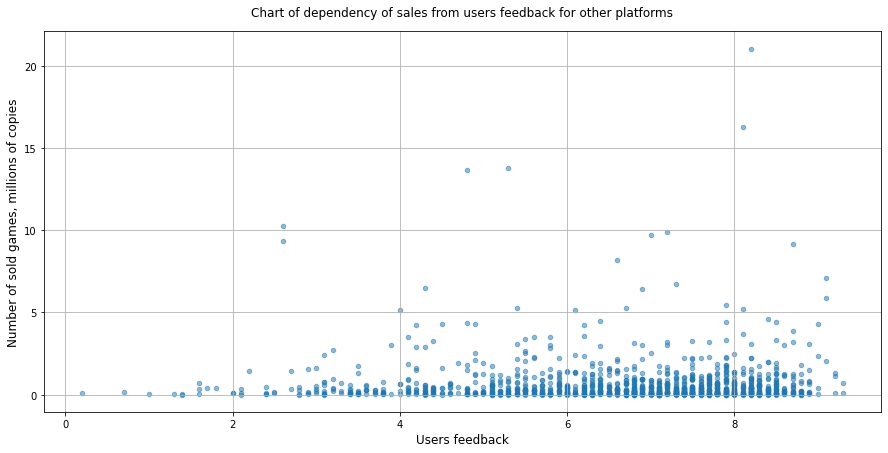

In [42]:
ax = games_other_platforms[games_other_platforms['user_score'] != -1].plot(x='user_score',
                                                                           y='total_sales',
                                                                           kind='scatter',
                                                                           figsize=(15, 7),
                                                                           alpha=0.5,
                                                                           grid=True)
ax.set_title('Chart of dependency of sales from users feedback for other platforms', pad=15)
ax.set_xlabel('Users feedback', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.show()

In [43]:
print('Correlation between users feedback and sales for other platforms:', 
      (games_other_platforms[games_other_platforms['user_score'] != -1]['user_score']
       .corr(games_other_platforms[games_other_platforms['user_score'] != -1]['total_sales'])))

Correlation between users feedback and sales for other platforms: 0.009703094920774534


The chart shows a high density of low sales in the interval with estimates from 5.5 to 8.5. The number of sales of more than 5 mln copies is small in principle, the values of the corresponding estimations varies in a very wide range from 2.6 to 8.3, though the largest number of sales exceeding 5 mln copies is within the range of estimations over 6 points. There is no correlation of any kind, which is confirmed by the almost zero correlation value.

<br>

**Analysis of game genres**

See how games are distributed by genre. To do this, group the dataframe `games` by genre, calculate the number of games of each genre and the total amount of sales by genre. We will take the data for the current period.

In [44]:
games_per_genre = (games[games['year_of_release'] > 2011]
                   .groupby(['genre'])
                   .agg({'total_sales': ['count', 'sum', 'mean', 'median']})
                   .reset_index()
                  )
games_per_genre.columns = list(games_per_genre.columns)
games_per_genre.columns

Index([            ('genre', ''),  ('total_sales', 'count'),
          ('total_sales', 'sum'),   ('total_sales', 'mean'),
       ('total_sales', 'median')],
      dtype='object')

Rename columns to more convenient names:

In [45]:
games_per_genre.rename(columns={('genre', ''): 'genre',
                                ('total_sales', 'count'): 'games_quantity',
                                ('total_sales', 'sum'): 'total_sales',
                                ('total_sales', 'mean'): 'mean_sales',
                                ('total_sales', 'median'): 'median_sales'},
                       inplace=True)

Display the summary table:

In [46]:
games_per_genre

,genre,games_quantity,total_sales,mean_sales,median_sales
0,Action,1041,446.41,0.428828,0.120
1,Adventure,302,29.43,0.097450,0.030
2,Fighting,109,44.49,0.408165,0.130
3,Misc,193,85.28,0.441865,0.120
4,Platform,85,61.00,0.717647,0.210
5,Puzzle,28,4.89,0.174643,0.045
6,Racing,115,53.50,0.465217,0.140
7,Role-Playing,370,192.80,0.521081,0.140
8,Shooter,237,304.75,1.285865,0.430
9,Simulation,80,35.12,0.439000,0.120


Make the distribution of games by genre and total sales by genre:

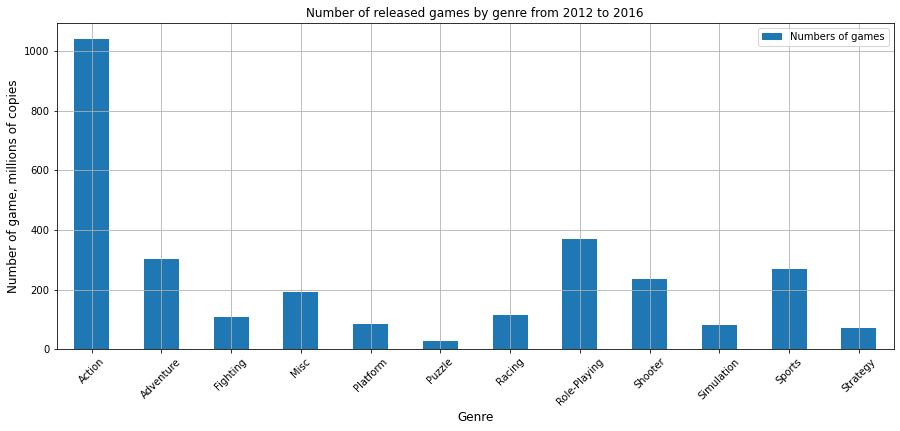

In [84]:
ax = games_per_genre.plot(x='genre', y='games_quantity', kind='bar', figsize=(15, 6), grid=True, label='Numbers of games')
ax.set_title('Number of released games by genre from 2012 to 2016')
ax.set_xlabel('Genre', fontsize = 12)
ax.set_ylabel('Number of game, millions of copies', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

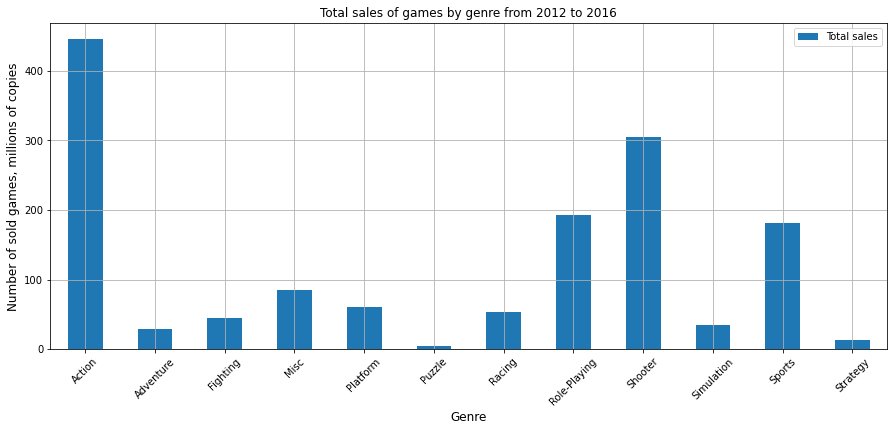

In [83]:
ax = games_per_genre.plot(x='genre',
                          y='total_sales',
                          kind='bar',
                          figsize=(15, 6),
                          grid=True,
                          alpha=1,
                          label='Total sales')
ax.set_title('Total sales of games by genre from 2012 to 2016')
ax.set_xlabel('Genre', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

On a separate chart we plot the distributions of average and median sales:

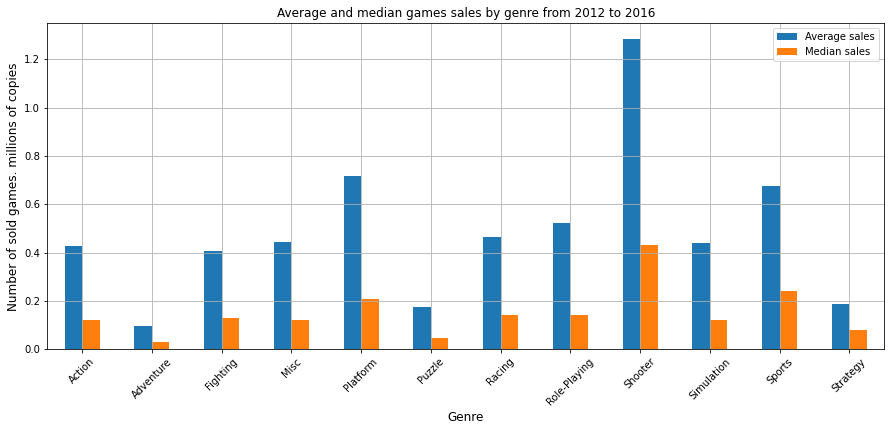

In [82]:
ax = games_per_genre.plot(x='genre',
                          y=['mean_sales', 'median_sales'],
                          kind='bar',
                          figsize=(15, 6),
                          grid=True,
                          alpha=1,
                          label=['Average sales', 'Median sales'])
ax.set_title('Average and median games sales by genre from 2012 to 2016')
ax.set_xlabel('Genre', fontsize = 12)
ax.set_ylabel('Number of sold games. millions of copies', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

The largest number of games sold in the Action genre - it is also the genre with the most copies sold. However, this genre does not have the highest average and median sales.

The second biggest seller is the Shooter genre, but it ranks only fifth in terms of number of games. Anyway, it has the highest average and median sales.

The third best-selling genre is Role-Playing, which is in second place by the number of released games. Average and median sales of this genre are also quite high.

The Shooter genre has the highest average and median sales, as mentioned above. It is followed by Sports and Platform genres. The Role-Playing ranks fourth and the Racing ranks fifth.

The genres the Puzzle, Strategy and Adventure have the smallest total sales. In addition, their averages and medians are also the lowest.

**Conclusion**

The most profitable genres can be considered those with high average sales. As we have already noticed, these are Shooter, Sports, Platform, Role-Playing and Racing. The genres with the lowest total and average sales are Puzzle, Strategy and Adventure.

**Conclusion of step 3**

Researched the data on games for the whole period, we can make the conclusion that for planning the next year we need to analyze the data for the last 5 years only. We chose the actual period from 2012 to 2016.

During the analysis of data for the actual period we identified two potentially profitable platforms: PS4 and XOne. Analized the impact of critics' and users' evaluations on sales, we made following conclusions: users trust the evaluation of authoritative sources, i.e. critics, rather than users. We observed a positive correlation between sales and critics' evaluations to consider data from a single game platform as well as from other platforms in general. The correlation between sales and user ratings is close to zero, indicating that there is no correlation.

Reserched games by genre, we found out that the most profitable genres are Shooter, Sports, Platform, Role-Playing and Racing, while Puzzle, Strategy and Adventure are the anti-leaders in sales.


## Creating of the user description of each region

Analyze how users preferences differ depending on the region: what platforms and genres are the most popular, and how the ESRB rating affects sales.

**The most popular platforms by region**

Group the data by platform and calculate total sales for each region. We will take the data for the current period.

In [50]:
games_per_region = (games[games['year_of_release'] > 2011]
                    .groupby(['platform'])
                    .agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
                    .reset_index()
                   )
games_per_region.columns = list(games_per_region.columns)
games_per_region.columns

Index([('platform', ''), ('na_sales', 'sum'), ('eu_sales', 'sum'),
       ('jp_sales', 'sum')],
      dtype='object')

Renaming columns:

In [51]:
games_per_region.rename(columns={('platform', ''): 'platform',
                                 ('na_sales', 'sum'): 'na_sales',
                                 ('eu_sales', 'sum'): 'eu_sales',
                                 ('jp_sales', 'sum'): 'jp_sales'},
                        inplace=True)

Display the top 5 platforms for North America (NA region), and summarize sales for the other platforms and record them in the new line `'others'`:

In [52]:
print('Top-5 Gaming Platforms in North America')
top5_platforms_na = (games_per_region[['platform', 'na_sales']]
                     .sort_values(by='na_sales', ascending=False).head(5))

new_row_na = {'platform' : 'others',
              'na_sales' : games_per_region['na_sales'].sum() - top5_platforms_na['na_sales'].sum()}

top5_platforms_na = top5_platforms_na.append(new_row_na, ignore_index=True)
top5_platforms_na

Top-5 Gaming Platforms in North America


,platform,na_sales
0,X360,140.57
1,PS4,108.74
2,PS3,103.74
3,XOne,93.12
4,3DS,55.49
5,others,91.64


Create a pie chart of sales of games for platforms from the top 5:

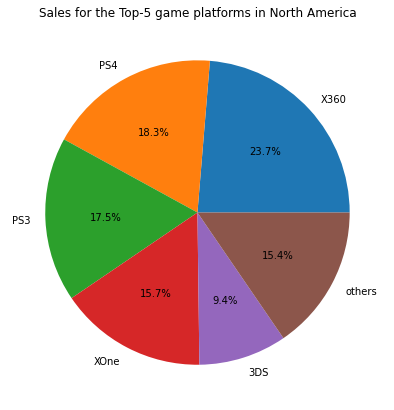

In [53]:
values = top5_platforms_na['na_sales']
labels = top5_platforms_na['platform']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sales for the Top-5 game platforms in North America')
plt.show()

Almost a quarter of all game sales (23.7%) in North America is the X360 platform. The shares of PS3 and PS4 are significantly different - 17.5% and 18.3%, respectively. The share of 3DS platform is a little less than 10%. The share of XOne games sales is 15.7%, which is almost equal to the share of sales of all other platforms.

Create similar tables and charts for Europe (EU) and Japan (JP).

In [54]:
print('Top-5 gaming platforms in Europe')
top5_platforms_eu = (games_per_region[['platform', 'eu_sales']]
                     .sort_values(by='eu_sales', ascending=False).head(5)
                    )
new_row_eu = {'platform' : 'others',
              'eu_sales' : games_per_region['eu_sales'].sum() - top5_platforms_eu['eu_sales'].sum()}

top5_platforms_eu = top5_platforms_eu.append(new_row_eu, ignore_index=True)
top5_platforms_eu

Top-5 gaming platforms in Europe


,platform,eu_sales
0,PS4,141.09
1,PS3,107.27
2,X360,74.89
3,XOne,51.59
4,3DS,42.83
5,others,91.51


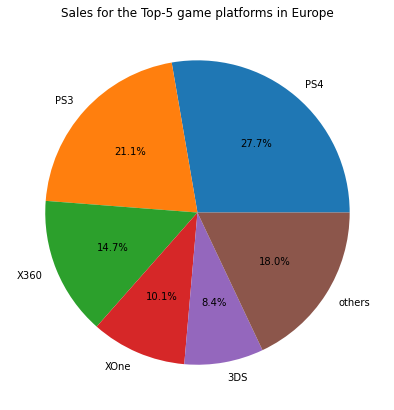

In [55]:
values = top5_platforms_eu['eu_sales']
labels = top5_platforms_eu['platform']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sales for the Top-5 game platforms in Europe')
plt.show()

The top 5 platforms in Europe is the same as in North America, but their shares are different. Almost half of all sales come from two platforms of the PlayStation family - PS4 and PS3, their shares are 27.7% and 21.1% respectively. In third place is the X360 platform with a share of 14.7%, and in fourth place is the XOne with a share of 10.1%. The last (fifth) place is taken by the 3DS platform with 8.4% of total sales. The share of the other platforms is 18%.

In [56]:
print('Top-5 game platforms in Japan')

top5_platforms_jp = (games_per_region[['platform', 'jp_sales']]
                     .sort_values(by='jp_sales', ascending=False).head(5))

new_row_jp = {'platform' : 'others',
              'jp_sales' : games_per_region['jp_sales'].sum() - top5_platforms_jp['jp_sales'].sum()}

top5_platforms_jp = top5_platforms_jp.append(new_row_jp, ignore_index=True)
top5_platforms_jp

Top-5 game platforms in Japan


,platform,jp_sales
0,3DS,87.79
1,PS3,35.29
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01
5,others,19.73


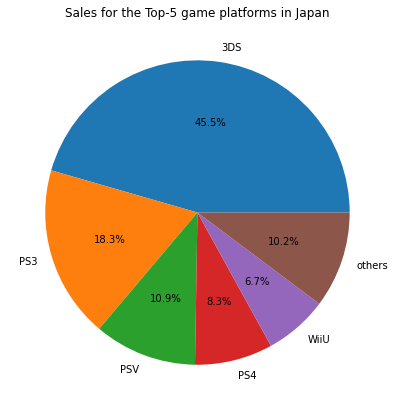

In [57]:
values = top5_platforms_jp['jp_sales']
labels = top5_platforms_jp['platform']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Sales for the Top-5 game platforms in Japan')
plt.show()

In Japan, the 3DS platform is very popular, with sales of  45.5% - almost half! The second, third and fourth places are the PlayStation family - PS3, PSV and PS4, respectively - with 18.3%, 10.9% and 8.3%. In fifth place is the WiiU platform with 6.7%. Other platforms account for 10.2% of sales.

<br>

**The most popular genres by region**

Group the data by genre and calculate the total sales for each region. We will take the data for the current period.

In [58]:
games_per_region_genre = (games[games['year_of_release'] > 2011]
                          .groupby(['genre'])
                          .agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
                          .reset_index()
                         )
games_per_region_genre.columns = list(games_per_region_genre.columns)
games_per_region_genre.columns

Index([('genre', ''), ('na_sales', 'sum'), ('eu_sales', 'sum'),
       ('jp_sales', 'sum')],
      dtype='object')

Renaming columns:

In [59]:
games_per_region_genre.rename(columns={('genre', ''): 'genre',
                                       ('na_sales', 'sum'): 'na_sales',
                                       ('eu_sales', 'sum'): 'eu_sales',
                                       ('jp_sales', 'sum'): 'jp_sales'},
                              inplace=True)

Display the Top 5 genres for North America (NA region):

In [60]:
print('Top-5 genres in North America')

top5_genres_na = (games_per_region_genre[['genre', 'na_sales']]
                  .sort_values(by='na_sales', ascending=False).head(5)
                 )
new_row_na = {'genre' : 'others',
              'na_sales' : games_per_region_genre['na_sales'].sum() - top5_genres_na['na_sales'].sum()}

top5_genres_na = top5_genres_na.append(new_row_na, ignore_index=True)
top5_genres_na

Top-5 genres in North America


,genre,na_sales
0,Action,180.15
1,Shooter,144.79
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19
5,others,84.64


Make a pie chart of game sales shares for platforms from the top 5, with the other platforms separated into "others" sector.

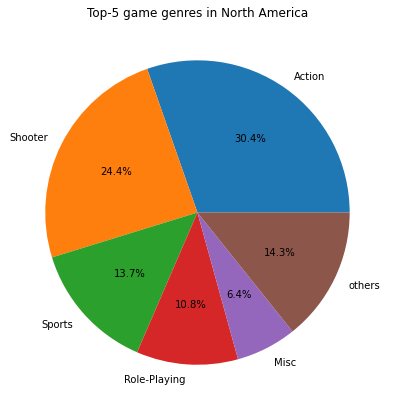

In [61]:
values = top5_genres_na['na_sales']
labels = top5_genres_na['genre']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top-5 game genres in North America')
plt.show()

The most popular genre in North America is Action. Its share is 30.4% of all sold games. With a small margin of a few percent goes genre Shooter with a share of 24.4%. In third place is Sports with 13.7% of sales. The fourth in the TOP-5 is Role-Playing with 10.8%. The fifth place is Misc, with 6.4%. Other genres account for 14.3%.

Made similar tables and pie charts for the other two regions.

In [62]:
print('Top-5 genres in Europe')

top5_genres_eu = (games_per_region_genre[['genre', 'eu_sales']]
                  .sort_values(by='eu_sales', ascending=False).head(5)
                 )
new_row_eu = {'genre' : 'others',
              'eu_sales' : games_per_region_genre['eu_sales'].sum() - top5_genres_eu['eu_sales'].sum()}

top5_genres_eu = top5_genres_eu.append(new_row_eu, ignore_index=True)
top5_genres_eu

Top-5 genres in Europe


,genre,eu_sales
0,Action,161.70
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29
5,others,89.10


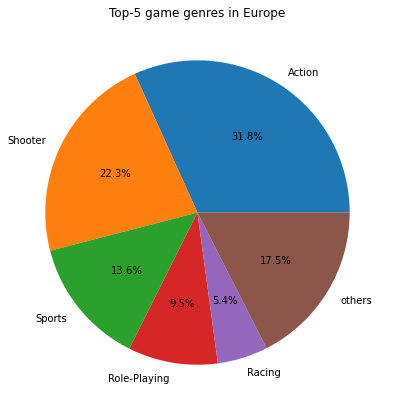

In [63]:
values = top5_genres_eu['eu_sales']
labels = top5_genres_eu['genre']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top-5 game genres in Europe')
plt.show()

For Europe we got a picture very similar to the situation with genres in North America, and even the shares of almost all genres are approximately the same. But there is a difference, the Racing genre is in last place, its share is 5.4%. The Action genre, which ranks first in North America, is even slightly more popular in Europe, as its share is a bit higher at 31.8%. The Shooter genre is almost a quarter of all sales - 22.3%. Sports and Role-Playing are 13.6% and 9.5%, with the other genres accounting for 17.5% of sales.

In [64]:
print('Top-5 game genres in Japan')

top5_genres_jp = (games_per_region_genre[['genre', 'jp_sales']]
                  .sort_values(by='jp_sales', ascending=False).head(5)
                 )
new_row_jp = {'genre' : 'others',
              'jp_sales' : games_per_region_genre['jp_sales'].sum() - top5_genres_jp['jp_sales'].sum()}

top5_genres_jp = top5_genres_jp.append(new_row_jp, ignore_index=True)
top5_genres_jp

Top-5 game genres in Japan


,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,13.10
3,Simulation,10.41
4,Fighting,9.44
5,others,41.63


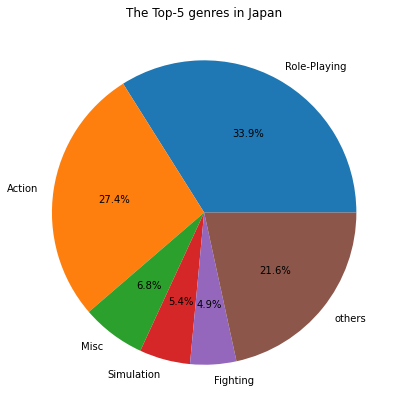

In [65]:
values = top5_genres_jp['jp_sales']
labels = top5_genres_jp['genre']
fig, ax = plt.subplots(figsize=(7, 7))
ax.pie(values, labels=labels, autopct='%1.1f%%')
plt.title('Top-5 genres in Japan')
plt.show()

In Japan, slightly different preferences: the Role-Playing genre has the highest sales share of 33.9%, followed by the Action genre with a share of 27.4%. The third, fourth, and fifth places are  Misc, Simulation, and Fighting, with small shares of 6.8%, 5.4%, and 4.9%, respectively. The third largest sector on the pie chart is occupied by other genres not included in the top-5 rating, which account for 21.6% of sold games.

<br>

**Impact of ESRB rating on sales**
Analyze whether the ESRB rating affects sales in each region. Group the data by rating (column `'rating'`) and calculate total sales for each region. We will take the data for the current period and exclude from the sample games with no rating (value `'RP'`).

In [66]:
games_per_rating = (games[(games['year_of_release'] > 2011) & (games['rating'] != 'RP')]
                    .groupby(['rating'])
                    .agg({'na_sales': ['sum'], 'eu_sales': ['sum'], 'jp_sales': ['sum']})
                    .reset_index()
                   )
games_per_rating.columns = list(games_per_rating.columns)
games_per_rating.columns

Index([('rating', ''), ('na_sales', 'sum'), ('eu_sales', 'sum'),
       ('jp_sales', 'sum')],
      dtype='object')

Renaming columns:

In [67]:
games_per_rating.rename(columns={('rating', ''): 'rating',
                                 ('na_sales', 'sum'): 'na_sales',
                                 ('eu_sales', 'sum'): 'eu_sales',
                                 ('jp_sales', 'sum'): 'jp_sales'},
                        inplace=True)

Plot the dependency of sales from age in North America:

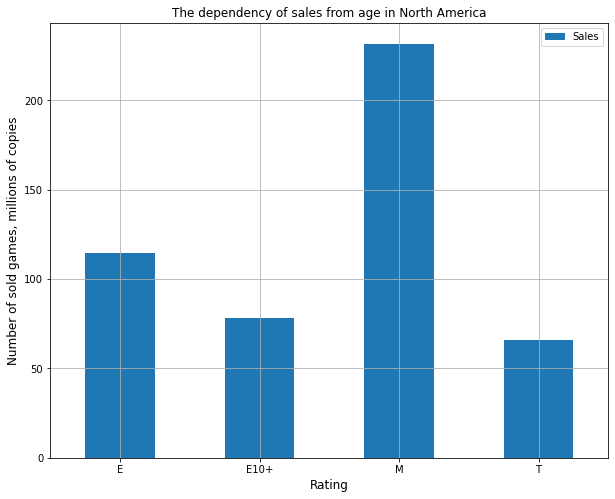

In [81]:
ax = games_per_rating.plot(x='rating', y='na_sales', kind='bar', figsize=(10, 8), grid=True, label='Sales')
ax.set_title('The dependency of sales from age in North America')
ax.set_xlabel('Rating', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

Before make conclusions, recall the deciphering of the ratings:

- E - or ages over 6;
- E10+ - for ages over 10;
- T - дfor ages over 13;
- M - for ages over 17;
As you can see from the chart, in North America the largest number of sold games is labeled M, i.e. intended for people 17 years and older. More than 200 million copies of these games have been sold in the last 5 years. About 2 times less games for  over 6 (E-marking) were sold - a little more than 100 million copies. E10+ and T-marked games were sold about 80 and 70 million copies, respectively.

Plot the dependency of sales from age in Europe:

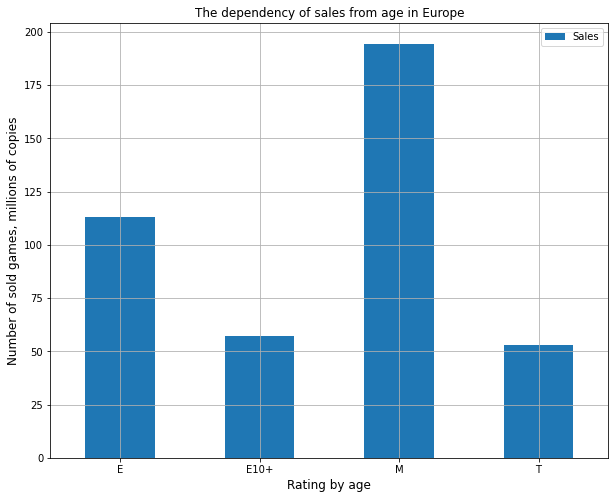

In [80]:
ax = games_per_rating.plot(x='rating', y='eu_sales', kind='bar', figsize=(10, 8), grid=True, label='Sales')
ax.set_title('The dependency of sales from age in Europe')
ax.set_xlabel('Rating by age', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

In Europe, sales of games for people over 17 are also leading. In second place, as well as in North America, are games for people over 6. But the number of games sold in each group - for people over 10 and 13  (E10+ and T marks) - is about the same and 2 times lower than games with the E mark.

Plot the dependency of sales from age in Japan:

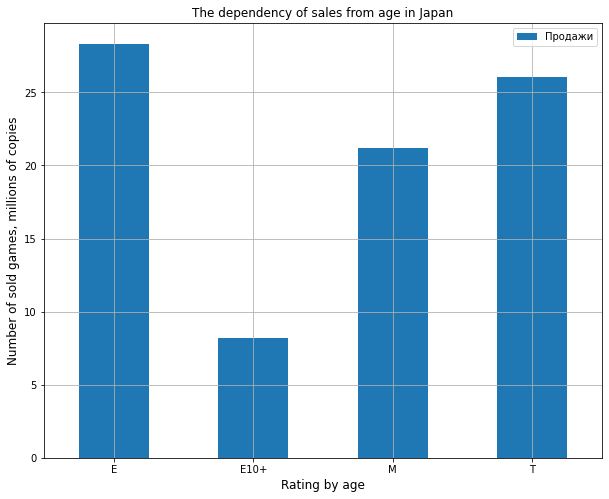

In [79]:
ax = games_per_rating.plot(x='rating', y='jp_sales', kind='bar', figsize=(10, 8), grid=True, label='Продажи')
ax.set_title('The dependency of sales from age in Japan')
ax.set_xlabel('Rating by age', fontsize = 12)
ax.set_ylabel('Number of sold games, millions of copies', fontsize = 12)
plt.xticks(rotation=0)
plt.show()

In Japan, the highest number of sold games  is for people over 6 (E). Games  T are slightly inferior in sales, games M sell about 25% less, and E10+ has the lowest number of sales.

**Conclusions for step 4**

As a result, we have the following users description by region:

- North American users are most likely to play on the X360, PS4, PS3, XOne, 3DS platforms. Their preferred game genres are Action, Shooter, Sports, Role-Playing, and Misc. The age ratings are M, E, E10+, T, with the M rating accounting for the largest market share;
- The European users have very similar characteristics:  they prefer the same game platforms, but in a slightly different sequence (PS4, PS3, X360, XOne, 3DS, where the first platform is the most popular, and further in descending order). The most common game genres in Europe are Action, Shooter, Sports, Role-Playing, Racing. The most popular games are rated M, E, E10+, T, where M is also predominant;
- In Japan, users prefer Japanese gaming platforms, with the 3DS at the top of the list with the biggest share of sales, followed by the PS3, PSV, PS4, WiiU. The most popular game genres among Japanese users are Role-Playing, Action, Misc, Simulation, and Fighting. The distribution of games by age ratings is quite different here than in North America and Europe: the E and T age ratings are roughly the same, the M age rating has slightly less sales, and the E10+ has the smallest share.

## Tests of hypotheses

**Hypothesis about the average user ratings of the Xbox One and PC platforms**

Test the hypothesis that the average user ratings of the Xbox One and PC platforms are the same. Start with the formulation of the zero hypothesis. Since the zero hypothesis is always formulated in such a way as to use the equal sign, in our case it will be:

*The average user ratings of the Xbox One and PC platforms are the same*,

and the alternative hypothesis for such a zero hypothesis is formulated as:

*Average user ratings for Xbox One and PC platforms are different*.

Since we are testing the equality of averages of two independent general populations by their samples, we use the method `.ttest_ind()` from the library `scipy` to test the hypothesis.

In order to make the calculations correctly, we first construct the distributions of user ratings for the Xbox One and PC platforms, and then calculate the dispersion.

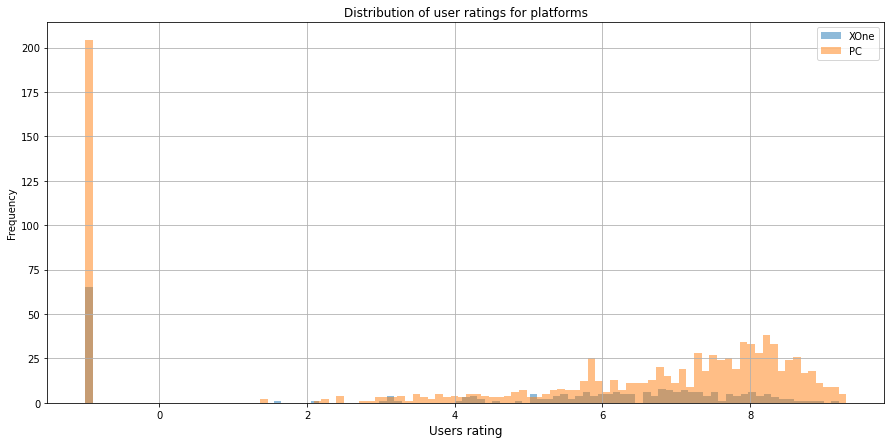

In [71]:
ax1 = games[games['platform'] == 'XOne']['user_score'].plot(kind = 'hist',
                                                            figsize = (15, 7),
                                                            alpha=0.5,
                                                            grid=True,
                                                            bins=100,
                                                            label='XOne')

ax2 = games[games['platform'] == 'PC']['user_score'].plot(kind = 'hist',
                                                          figsize = (15, 7),
                                                          grid=True,
                                                          alpha=0.5,
                                                          bins=100,
                                                          label='PC')

ax1.set_title('Distribution of user ratings for platforms')
ax1.set_xlabel('Users rating', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

Looking at the resulting distributions, we can conclude that we have outliers at the value `-1`, which appeared as a result of choosing a marker to fill in NaN. It can negatively affect further results, therefore, when calculating dispersions and testing hypotheses, it is necessary to exclude this NaN from the sample.

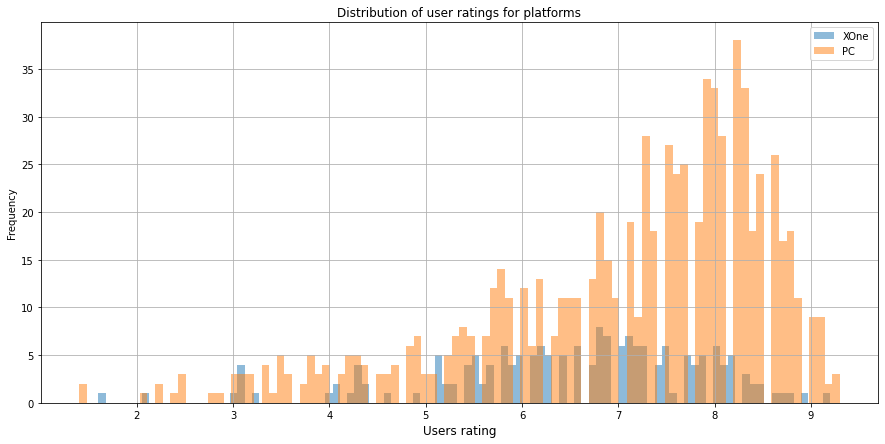

In [72]:
ax1 = games[(games['platform'] == 'XOne') & (games['user_score'] != -1)]['user_score'].plot(kind = 'hist',
                                                                                            figsize = (15, 7),
                                                                                            alpha=0.5,
                                                                                            grid=True,
                                                                                            bins=100,
                                                                                            label='XOne')

ax2 = games[(games['platform'] == 'PC') & (games['user_score'] != -1)]['user_score'].plot(kind = 'hist',
                                                                                          figsize = (15, 7),
                                                                                          grid=True,
                                                                                          alpha=0.5,
                                                                                          bins=100,
                                                                                          label='PC')

ax1.set_title('Distribution of user ratings for platforms')
ax1.set_xlabel('Users rating', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

Colculate dispersions:

In [73]:
print('Dispersion of User Rating for Xbox One Platform:',
      np.var(games[(games['platform'] == 'XOne') & (games['user_score'] != -1)]['user_score'], ddof=1))

print('Dispersion of User Rating for PC:',
      np.var(games[(games['platform'] == 'PC') & (games['user_score'] != -1)]['user_score'], ddof=1))

Dispersion of User Rating for Xbox One Platform: 1.9069968429360702
Dispersion of User Rating for PC: 2.334881141316402


The dispersions are different, so when testing the hypothesis, we set `equal_var = False`. Let's move on to testing hypotheses. The critical level of statistical significance will be set at 5%.

In [74]:
alpha = 0.05  # critical level of statistical significance

results = st.ttest_ind(games[(games['platform'] == 'XOne') & (games['user_score'] != -1)]['user_score'],
                       games[(games['platform'] == 'PC') & (games['user_score'] != -1)]['user_score'],
                       equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the zero hypothesis')
else:
    print('Not rejecting the zero hypothesis') 

p-value: 4.101854214173904e-06
Rejecting the zero hypothesis


We see that the p-value turned out to be very close to zero, and we reject the null hypothesis. This means that we do not reject the alternative hypothesis that the average user ratings of the Xbox One and PC platforms are different.

<br><br>

**Hypothesis about the average user ratings of Action and Sports genres**

Now test the hypothesis that the average user ratings of the Action and Sports genres are different. We construct distributions and calculate the dispersions for these samples.

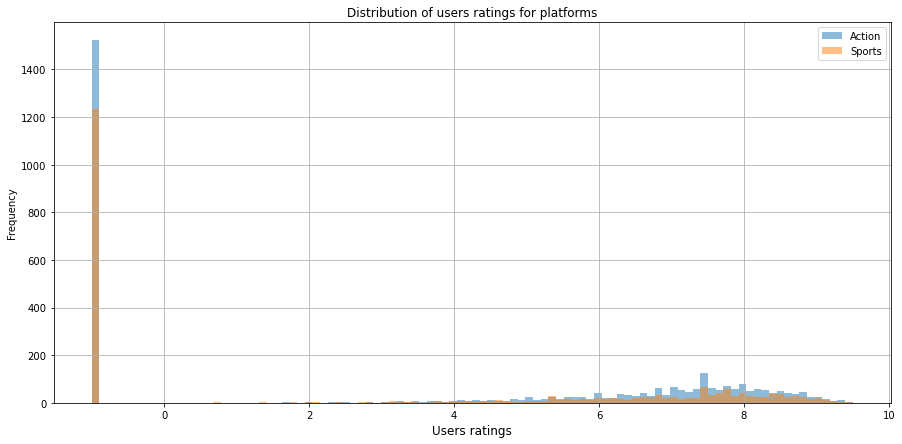

In [75]:
ax1 = games[games['genre'] == 'Action']['user_score'].plot(kind = 'hist',
                                                           figsize = (15, 7),
                                                           alpha=0.5,
                                                           grid=True,
                                                           bins=100,
                                                           label='Action')

ax2 = games[games['genre'] == 'Sports']['user_score'].plot(kind = 'hist',
                                                           figsize = (15, 7),
                                                           grid=True,
                                                           alpha=0.5,
                                                           bins=100,
                                                           label='Sports')

ax1.set_title('Distribution of users ratings for platforms')
ax1.set_xlabel('Users ratings', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

Again we see emissions on the value `-1`. Let us exclude them from the samples when calculating dispersions and testing hypotheses. 
Display the dispersions:

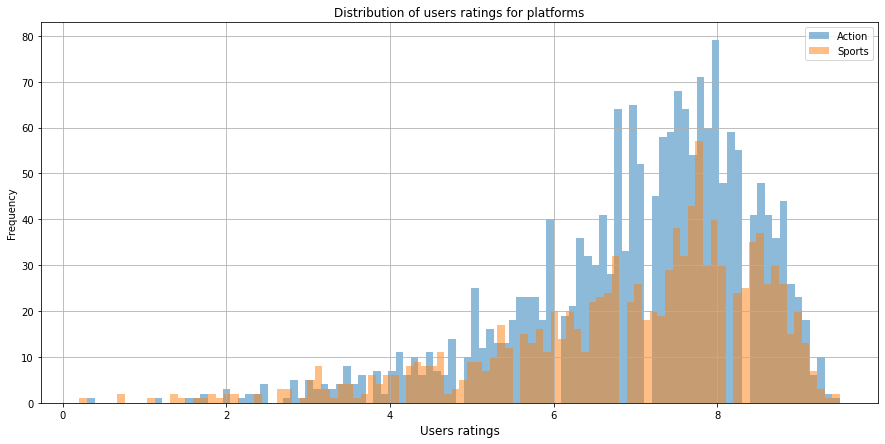

In [76]:
ax1 = games[(games['genre'] == 'Action') & (games['user_score'] != -1)]['user_score'].plot(kind = 'hist',
                                                                                           figsize = (15, 7),
                                                                                           alpha=0.5,
                                                                                           grid=True,
                                                                                           bins=100,
                                                                                           label='Action')

ax2 = games[(games['genre'] == 'Sports') & (games['user_score'] != -1)]['user_score'].plot(kind = 'hist',
                                                                                           figsize = (15, 7),
                                                                                           grid=True,
                                                                                           alpha=0.5,
                                                                                           bins=100,
                                                                                           label='Sports')

ax1.set_title('Distribution of users ratings for platforms')
ax1.set_xlabel('Users ratings', fontsize = 12)
ax1.legend(loc = 'upper right')
ax2.legend(loc = 'upper right')
plt.show()

In [77]:
print('Dispersion of users rating for Action genre:',
      np.var(games[(games['genre'] == 'Action') & (games['user_score'] != -1)]['user_score'], ddof=1))

print('Dispersion of users rating for Sports genre:',
      np.var(games[(games['genre'] == 'Sports') & (games['user_score'] != -1)]['user_score'], ddof=1))

Dispersion of users rating for Action genre: 2.024746286149256
Dispersion of users rating for Sports genre: 2.6012400851469364


We formulate the zero and alternative hypotheses:

- zero hypothesis: *Average user ratings for Action and Sports genres are the same*;
- Alternative hypothesis: *Average user ratings for Action and Sports genres are different*.

Apply the `.ttest_ind()` method again to the selections of Action and Sports games. Given that the variances are not equal, let's pass `equal_var = False` to the method. Set the critical level of statistical significance `alpha` to 5%.

In [78]:
alpha = 0.05

results = st.ttest_ind(games[(games['genre'] == 'Action') & (games['user_score'] != -1)]['user_score'],
                       games[(games['genre'] == 'Sports') & (games['user_score'] != -1)]['user_score'],
                       equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Rejecting the zero hypothesis')
else:
    print('Not rejecting the zero hypothesis') 

p-value: 0.08991887133875968
Not rejecting the zero hypothesis


We see that the p-value is more than the critical level of statistical significance, and we do not reject the zero hypothesis. So, we reject the alternative that the average user ratings of the Action and Sports genres are different.

**Conclusions for the step 5**

The tests showed that the hypotheses "Average user ratings of the Xbox One and PC platforms are the same" and "Average user ratings of the Action and Sports genres are different" are rejected.

## General conclusion

After conducting an analysis based on a dataset obtained from open sources, which presents historical data on game sales, users and experts feedback, dependence of sales on genres and platforms, we found out that the average life cycle of a gaming platform is 10 years, during this period new games appear and disappear, and a platform goes through a full cycle of 'growth-maximum-decline'. To plan sales for the next year, it is important for us to observe not the whole life cycle of platforms, but only trends, so a five-year period was chosen, in our case, 2012-2016. Analyzing the data for the last 5 years, we have identified the following patterns:

- Potentially profitable platforms - PlayStation4 and XBox One;
- When making a decision to buy a game, the consumer trusts critics' ratings much more than users ratings. Moreover, no relationship was found between users ratings and sales;
- The top-grossing game genres are Shooter, Sports, Platform, Role-Playing, and Racing, and the worst-selling game genres are Puzzle, Strategy, and Adventure.

We also foud out the preferences of users from the three largest consumption regions - North America, Europe and Japan, and come to an understanding that users from North America and Europe are similar in many aspect regarding the consumption in the gaming sector, while users from Japan are differ in many ways from North Americans and Europeans. Here are the users description:
- In North America, the top 5 most popular platforms are X360, PS4, PS3, XOne, 3DS (the titles are listed in descending order from most popular to least popular). The top 5 popular game genres are Action, Shooter, Sports, Role-Playing, Misc. Games for people over 17 years old (M) are in the highest demand in the region, games for people over 6 years old (E) are already sold 2 times less often. And sales of games for ages 10+ (E10+) and 13+ (T) account for about a third of the sales of M-rated games.
- In Europe, the  rating of the top 5 platforms is PS4, PS3, X360, XOne, 3DS. The  rating of the top 5 genres is Action, Shooter, Sports, Role-Playing, Racing. The distribution of sales by age ratings is similar to North American.
- In Japan, there is a clear preference for gaming platforms from Japanese manufacturers. The top 5 platforms is 3DS, PS3, PSV, PS4, WiiU. The most popular game genres among Japanese users are Role-Playing, Action, Misc, Simulation, Fighting. The influence of age ratings on sales in Japan is as follows: games for ages 6 (E) and 13 years (T) are bought the most, games for ages 17 and over (M) are bought slightly less, and sales are about 3 times lower compared to with a T rating show games for people over 10 years old (E10+).
We also tested two hypotheses: "The average users ratings of the Xbox One and PC platforms are the same" and "The average users ratings of the Action and Sports genres are different", as a result we rejected both hypotheses.